In [1]:
# Quick Recap
# Numpy is a Python library that implements numerical algorithms based around "arrays"
# Arrays are like n-dimensional matrices
import numpy as np
print('1D Array\n', np.ones([3]))
print('\n2D Array\n', np.zeros([3,3]))

# Numpy arrays have an important attribute called "shape" which returns a tuple the size of each dimension
ar = np.zeros([3,2,1])
print("ar has dimensions:", ar.shape)

# Numpy includes many methods for manipulating arrays.
# For example, .reshape() let's you reformat your array to different sized dimensions
print('\n3D Array\n', np.arange(8).reshape([2,2,2]))

#Arrays can be modified using arithemetic operations. Operations are applied to each element individually

ar0 = np.arange(16).reshape([4,4])
print('\nAr0:\n',ar0)
ar0 *= ar0 #i.e., ar0 = ar0 * ar0
ar0 += 2 #i.e., ar0 = ar0 + 2
print('\nAr0:\n',ar0)

#One thing that makes arrays very useful is the way in which you can access specific elements using "slicing"
ar1 = np.arange(16).reshape([4,4])

mask = ar1 >= 3 #we create a new array using a boolean operator that return True where ar1 is >= 3, False otherwise


print('\nIndexing ar0 with mask:', ar0[mask]) #we can then use the "mask" array to index the ar0 array




1D Array
 [1. 1. 1.]

2D Array
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
ar has dimensions: (3, 2, 1)

3D Array
 [[[0 1]
  [2 3]]

 [[4 5]
  [6 7]]]

Ar0:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]

Ar0:
 [[  2   3   6  11]
 [ 18  27  38  51]
 [ 66  83 102 123]
 [146 171 198 227]]

Indexing ar0 with mask: [ 11  18  27  38  51  66  83 102 123 146 171 198 227]


In [2]:
### Outline

# 1. Random numbers
# 2. DataFrames for storing and manipulating data
# 3. Data visualization with matplotlib/seaborn
# 4. Basic statistics with scipy

In [3]:
### Generating Random Number 

# Numpy has a very useful submodule called "random" that allows us to generate arrays of random numbers
# sampled from different distributions

import numpy as np

#uniform(lower_bound, upper_bound, shape) returns an array with dimensions <shape> with uniformly distributed
# random values between <lower_bound> and <upper_bound>
uniform_vector = np.random.uniform(0,10,[5])
print('Uniform:\n', uniform_vector)

#normal(mean, sd, shape) returns an array with dimensions <shape> with normally distributed
# random values with mean <mean> and standard deviation <sd>.
normal_matrix = np.random.uniform(0,1,[3,3])
print('Normal:\n', normal_matrix)


Uniform:
 [6.73654085 7.23752861 7.55522262 8.0439609  4.42350094]
Normal:
 [[0.37734836 0.22757169 0.42767204]
 [0.36451655 0.28816023 0.4237148 ]
 [0.49058543 0.36903577 0.74818812]]


In [4]:
### DataFrames with Pandas

# Pandas is a widely used Python library that implements "Data Frames"
# Data Frames are like excel spreadsheets, but much better and easier to use
# Data Frames contain rows and columns of data and a multitude of functions
# for slicing (indexing) or manipulating the data
import pandas as pd

# this creates an empty DataFrame based on an empty list
df = pd.DataFrame([])
print(df)



Empty DataFrame
Columns: []
Index: []


In [5]:
# We can add columns of data to our DataFrame in the same way we would with a dictionary
n=10
df = pd.DataFrame([])
df['subects']=np.arange(n).astype(str)
df['score']=np.random.uniform(0,100,n)
df

# Note, DataFrames can contain many data types, but columns (i.e., "Series") can only contain a single
# data type.


,subects,score
0,0,1.458610
1,1,97.030407
2,2,87.454409
3,3,0.177737
4,4,60.853523
5,5,55.034211
6,6,84.485078
7,7,21.189025
8,8,9.089129
9,9,45.429059


In [6]:
# DataFrames can also be created from lists or dictionaries

#Create from lists, have to set column names
print(pd.DataFrame( [['a','b'],[2,3]], columns=['A','B']) )
print()
#Create from dictionaries
print(pd.DataFrame( {'A':['a',2],'B':['b',3]} ) )

   A  B
0  a  b
1  2  3

   A  B
0  a  b
1  2  3


In [7]:
### Reading and writing DataFrames

# You can save your dataframe to a .csv file (.csv = comma-separated text file)

df.to_csv('df.csv')

# You can also easily read .csv files by using

df2 = pd.read_csv('df.csv')

df2


,Unnamed: 0,subects,score
0,0,0,1.458610
1,1,1,97.030407
2,2,2,87.454409
3,3,3,0.177737
4,4,4,60.853523
5,5,5,55.034211
6,6,6,84.485078
7,7,7,21.189025
8,8,8,9.089129
9,9,9,45.429059


In [8]:
### EXCERCISE
# 1. Create your own data frame with a "subjects" and "scores" column
# 2. Save your dataframe to a .csv file and then read it


In [9]:
# Pandas has methods for applying functions to columns, like mean and standard deviations
df = pd.read_csv('df.csv')
print(df['score'].mean(), df['score'].std(), df['score'].sum())

46.22011880051061 36.76859975019678 462.20118800510613


In [10]:
### Excercise

# 1. Create a new column called "zscore" which contains normalized values for the "scores": (score - mean)/std


In [11]:





### Solution


import pandas as pd
import numpy as np
newDf = pd.DataFrame([])
newDf['subjects']=['a','b','c','d']
newDf['scores']=np.random.uniform(0,100,newDf.shape[0])

newDf['zscores']=(newDf['scores'] - newDf['scores'].mean())/newDf['scores'].std()
print(newDf)

  subjects     scores   zscores
0        a  12.473617 -0.611442
1        b  11.972601 -0.632547
2        c  21.525595 -0.230141
3        d  61.984475  1.474130


In [12]:
# Lambda functions
# lambda fuctions are a way to write quick one line functions
# they look like this:
# <function name> = lambda <arguments> : <some code>
# whatever gets returned in <some code> will be returned from the function when you call it
# example 
add_one = lambda x : x + 1
print(add_one(1))

2


In [13]:
#variables that are defined outside of the scope of the lambda function can be used inside of the lambda function
home_dir = '/path/to/home/directory/'

gen_filename = lambda fn : home_dir + '/' + fn
print(gen_filename('brain.nii.gz'))

/path/to/home/directory//brain.nii.gz


In [14]:
# Applying your own function to a column with .apply
df = pd.read_csv('df.csv')
max_score = df['score'].max()
min_score = df['score'].min()

normalize_range = lambda x : (x - min_score) /(max_score-min_score)

#pandas will use each element of the 'score' row as an argument to a serpate call of 'normalize_range'
df['score_norm_range'] = df['score'].apply(normalize_range) 

print(df)


   Unnamed: 0  subects      score  score_norm_range
0           0        0   1.458610          0.013225
1           1        1  97.030407          1.000000
2           2        2  87.454409          0.901128
3           3        3   0.177737          0.000000
4           4        4  60.853523          0.626475
5           5        5  55.034211          0.566391
6           6        6  84.485078          0.870470
7           7        7  21.189025          0.216941
8           8        8   9.089129          0.092010
9           9        9  45.429059          0.467218


In [15]:
#You can apply these functions to subsets of your data with the .groupby(<list of groups>) function
df = pd.read_csv('df.csv')
df['group']=np.random.choice(['Control','Patient'],df.shape[0]) # Add a new column to identify subjects as 'Control' or 'Patient'
df.to_csv('df_with_group.csv')
print('A.')
print(df)

print('\nB.')
for group_df in df.groupby(['group']):
    print(group_df)

print('\nC.')
print(df.groupby(['group'])['score'].mean()) # Calculate mean by group

A.
   Unnamed: 0  subects      score    group
0           0        0   1.458610  Patient
1           1        1  97.030407  Control
2           2        2  87.454409  Control
3           3        3   0.177737  Patient
4           4        4  60.853523  Control
5           5        5  55.034211  Patient
6           6        6  84.485078  Patient
7           7        7  21.189025  Patient
8           8        8   9.089129  Patient
9           9        9  45.429059  Patient

B.
('Control',    Unnamed: 0  subects      score    group
1           1        1  97.030407  Control
2           2        2  87.454409  Control
4           4        4  60.853523  Control)
('Patient',    Unnamed: 0  subects      score    group
0           0        0   1.458610  Patient
3           3        3   0.177737  Patient
5           5        5  55.034211  Patient
6           6        6  84.485078  Patient
7           7        7  21.189025  Patient
8           8        8   9.089129  Patient
9           9        9

In [16]:
### Excercise

# Use a lambda function and .groupby() to calculate z-score by Patient/Control group





In [17]:





### Solution
df = pd.read_csv('df_with_group.csv')
x_mean = df['score'].mean()
x_std = df['score'].std()
zscore = lambda x : (x - x_mean) / x_std 
df['group_zscore'] = df.groupby(['group'])['score'].apply(zscore)
print(df)

   Unnamed: 0  Unnamed: 0.1  subects      score    group  group_zscore
0           0             0        0   1.458610  Patient     -1.217384
1           1             1        1  97.030407  Control      1.381893
2           2             2        2  87.454409  Control      1.121454
3           3             3        3   0.177737  Patient     -1.252220
4           4             4        4  60.853523  Control      0.397986
5           5             5        5  55.034211  Patient      0.239718
6           6             6        6  84.485078  Patient      1.040697
7           7             7        7  21.189025  Patient     -0.680774
8           8             8        8   9.089129  Patient     -1.009856
9           9             9        9  45.429059  Patient     -0.021515


In [18]:
# groupby() is very convenient for applying functions to sub-groups within your data.
# However it's often useful to access specific elements of a DataFrame. This can be accomplished with
# .iloc() or .loc()
# .iloc() allows you to index based on row/column numbers

print('Index 0th row:\n',df.iloc[0,:],'\n')
print('Index 0-1st row:\n',df.iloc[0:2,:],'\n') #remember: indexing with integers x:y return values from x to y-1
print('Index 0th column:\n', df.iloc[:,0],'\n')

Index 0th row:
 Unnamed: 0            0
Unnamed: 0.1          0
subects               0
score           1.45861
group           Patient
group_zscore   -1.21738
Name: 0, dtype: object 

Index 0-1st row:
    Unnamed: 0  Unnamed: 0.1  subects      score    group  group_zscore
0           0             0        0   1.458610  Patient     -1.217384
1           1             1        1  97.030407  Control      1.381893 

Index 0th column:
 0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
Name: Unnamed: 0, dtype: int64 



In [19]:
# The .loc() method allows you to index based on row/column names
print('Index "Patient" in "groups" column:\n',df.loc[df["group"]=="Patient"],'\n')
print('Index rows with scores below 50:\n',df.loc[df["score"]<50],'\n')


Index "Patient" in "groups" column:
    Unnamed: 0  Unnamed: 0.1  subects      score    group  group_zscore
0           0             0        0   1.458610  Patient     -1.217384
3           3             3        3   0.177737  Patient     -1.252220
5           5             5        5  55.034211  Patient      0.239718
6           6             6        6  84.485078  Patient      1.040697
7           7             7        7  21.189025  Patient     -0.680774
8           8             8        8   9.089129  Patient     -1.009856
9           9             9        9  45.429059  Patient     -0.021515 

Index rows with scores below 50:
    Unnamed: 0  Unnamed: 0.1  subects      score    group  group_zscore
0           0             0        0   1.458610  Patient     -1.217384
3           3             3        3   0.177737  Patient     -1.252220
7           7             7        7  21.189025  Patient     -0.680774
8           8             8        8   9.089129  Patient     -1.009856
9   

In [20]:
# Indexed elements in a DataFrame can also be modified (like with a numpy array)
# Here we are modifying the "Group" column in the DataFrame. All elements in "Group" column will be set to
# 'Experimental'
df['group'].loc[df["group"]=='Patient'] = 'Experimental'
print(df)

   Unnamed: 0  Unnamed: 0.1  subects      score         group  group_zscore
0           0             0        0   1.458610  Experimental     -1.217384
1           1             1        1  97.030407       Control      1.381893
2           2             2        2  87.454409       Control      1.121454
3           3             3        3   0.177737  Experimental     -1.252220
4           4             4        4  60.853523       Control      0.397986
5           5             5        5  55.034211  Experimental      0.239718
6           6             6        6  84.485078  Experimental      1.040697
7           7             7        7  21.189025  Experimental     -0.680774
8           8             8        8   9.089129  Experimental     -1.009856
9           9             9        9  45.429059  Experimental     -0.021515


/home/t/.local/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [21]:
# If possible, it's usually better to access and modify your DataFrames with .groupby()
# or with indexing.

# However, you can also iterate over the rows of a DataFrame using .iterrows()
for row_number, row in df.iterrows():
    print(row_number, row,'\n')

0 Unnamed: 0                 0
Unnamed: 0.1               0
subects                    0
score                1.45861
group           Experimental
group_zscore        -1.21738
Name: 0, dtype: object 

1 Unnamed: 0            1
Unnamed: 0.1          1
subects               1
score           97.0304
group           Control
group_zscore    1.38189
Name: 1, dtype: object 

2 Unnamed: 0            2
Unnamed: 0.1          2
subects               2
score           87.4544
group           Control
group_zscore    1.12145
Name: 2, dtype: object 

3 Unnamed: 0                 3
Unnamed: 0.1               3
subects                    3
score               0.177737
group           Experimental
group_zscore        -1.25222
Name: 3, dtype: object 

4 Unnamed: 0             4
Unnamed: 0.1           4
subects                4
score            60.8535
group            Control
group_zscore    0.397986
Name: 4, dtype: object 

5 Unnamed: 0                 5
Unnamed: 0.1               5
subects            

In [22]:
### Basic Data Visualization with Matplotlib/Seaborn & Statistics with Scipy


# now we're going to use the random library to create functions that produce random data that 
# looks like data you might acquire in a real experiment
import numpy as np
import pandas as pd

def gen_population_data(pop_means, sd, n_samples):
    '''  '''
    df=pd.DataFrame([])
    for pop_index, mean in enumerate(pop_means) :
        pop_name = 'Pop.'+str(pop_index)
        df[pop_name] = np.random.normal(mean, sd, n_samples)
    return df

df = gen_population_data([0,1],1,30)
print('Before melt:\n',df)
# melt() is a method that reshapes the data so that there is one row for each data point.
# value vars specifies the columns which have data points in them.
df = df.melt(value_vars = df.columns,var_name='population',value_name='score')
print('After melt:\n',df)

Before melt:
        Pop.0     Pop.1
0  -0.729913  1.051803
1  -0.784789  1.099681
2   0.498268  0.470025
3  -0.687807  1.641830
4   0.018855  1.004432
5   0.470389  0.813745
6  -1.534404  0.723284
7  -1.739538  0.463751
8  -0.260174  1.197894
9  -0.655313  2.058658
10  1.252931  0.097903
11 -0.420326  1.222600
12  0.309710  2.350501
13 -0.114250  2.313479
14  0.309532  0.501073
15  0.313709 -0.740341
16 -0.170907  1.065035
17  0.044647  2.332814
18 -0.399787  2.496834
19 -1.461809  0.333518
20 -0.208959  0.842706
21 -0.213862  1.218950
22 -1.063223  1.479465
23  0.417409 -0.480154
24  0.875353 -0.044554
25 -0.720769  0.950446
26 -0.020083  2.480777
27  0.758893  1.627563
28 -1.809760 -1.726042
29  0.507128  1.725523
After melt:
    population     score
0       Pop.0 -0.729913
1       Pop.0 -0.784789
2       Pop.0  0.498268
3       Pop.0 -0.687807
4       Pop.0  0.018855
5       Pop.0  0.470389
6       Pop.0 -1.534404
7       Pop.0 -1.739538
8       Pop.0 -0.260174
9       Pop.0 -0.655

In [23]:
#Seaborn is a plotting library based on Matplotlib and Pandas. 
#It generally produces prettier plots and is easier to use
import seaborn as sns 
import matplotlib.pyplot as plt

# Seaborn plots usually require you specify the names of the columns you want to 
# use for the x and y axis as well as the name of the dataframe you want to use for plotting
# Usually requires data in "long" format, with one data point per line
sns.catplot(x="population", y="score", data=df)
plt.show()

<Figure size 500x500 with 1 Axes>

In [24]:
### Statistics : T-test

from scipy import stats

x = df['score'].loc[ df['population'] == 'Pop.0']
y = df['score'].loc[ df['population'] == 'Pop.1']
# Here we use the "stats" submodule from scipy and use the 'ttest_ind' to perform an ind. t test
stats.ttest_ind(x,y )

Ttest_indResult(statistic=-5.48216295436288, pvalue=9.559330599390525e-07)

In [25]:
### Statistics : One-way ANOVA
# here we generate a new set of simulated data, this time with 3 populations
df_3pop = gen_population_data([0,.3,0.6],1,30)

print(df_3pop) #note that this data frame still has a wide format! 
# hence we can just input each column as a separate argument for 'f_oneway' to calculate an ANOVA
# using the 3 populations
stats.f_oneway(df_3pop.iloc[:,0],df_3pop.iloc[:,1],df_3pop.iloc[:,2])

       Pop.0     Pop.1     Pop.2
0   0.435322 -1.793692 -1.980003
1   0.180130  0.647532  1.536755
2   1.570187  0.460976  2.497257
3   0.826717  1.496585  0.270145
4  -0.040215  1.798140 -0.267422
5  -0.441960  0.037719  0.948315
6   0.199703 -1.350591  0.576684
7  -0.497297 -0.802110  1.645653
8  -1.409269  0.292299  0.271554
9  -3.154310  1.508113  1.480880
10  1.395813  1.524060  0.065609
11 -1.162373 -0.328684  1.198699
12  0.789646  0.251882  0.152502
13 -0.430025  1.324212  1.574524
14  0.134894  2.122191  1.366692
15 -0.129247 -0.208475  1.887173
16  1.153538  0.264630 -0.430156
17 -1.409202  2.050921  0.391612
18 -0.869419  0.498048  0.785197
19  0.055517 -0.335405 -0.427856
20 -1.451038 -0.048892  1.473385
21  0.202540  1.157693 -0.058215
22  0.160327  1.779352  1.414005
23 -1.660670  0.970616  1.099420
24 -1.352887  0.966623  1.172044
25 -2.690860 -0.526233  0.127524
26 -0.789368 -0.529055  0.551340
27 -1.769866 -0.357552  1.698318
28  0.061196  2.088304  1.898377
29  0.7378

F_onewayResult(statistic=10.193571417050935, pvalue=0.00010535689875369607)

LinregressResult(slope=0.019592297434429577, intercept=0.2812177596985207, rvalue=0.10795258795074136, pvalue=0.45553586119573186, stderr=0.02604271422801707)


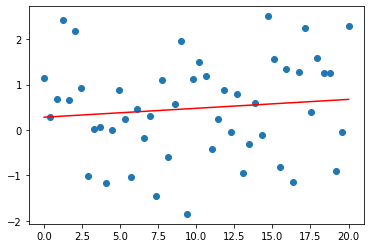

In [26]:
### Statistics : Linear Regression

def gen_time_series(min_x,max_x):
    x=np.linspace(min_x,max_x)
    y=x/max_x + np.random.normal(0,1,x.shape)
    return x,y

x,y = gen_time_series(0,20)

model = stats.linregress(x,y) #linear regression between y and x, save results as variable 'model'

print(model)
slope = model[0]
intercept = model[1]
y_est = intercept + slope * x # calculate the points on the line calculated by the regression

plt.scatter(x,y) # scatter produces a scatter plot 
plt.plot(x, y_est,c='r') # the plot function in matplotlib plots lines between points
plt.show()

In [27]:
### EXCERCISE
# 1. Use the simulated data below to calculate an ANOVA and then perform post-hoc testing with 
# an independent T-test
# 2. 'melt' the data to reformat it to long-version and create a plot of the three populations.


df_test = gen_population_data([0,.1,1],1,30)
df_test

,Pop.0,Pop.1,Pop.2
0,0.533227,0.667102,0.228962
1,0.216378,1.080687,1.192117
2,-0.037077,-0.928131,1.639911
3,0.161058,-0.639035,1.459875
4,-0.750616,-0.181326,1.929985
5,0.256038,-1.059839,1.710926
6,0.673479,0.666078,0.634867
7,-0.971596,-0.022719,0.036657
8,-0.461403,0.289363,0.610761
9,-0.695460,0.240129,0.423023


F_onewayResult(statistic=10.685283249870983, pvalue=7.086699890131967e-05)
Ttest_indResult(statistic=-0.07931303169603597, pvalue=0.9370566602717149)
Ttest_indResult(statistic=-3.6501418844341877, pvalue=0.0005636729562226966)
Ttest_indResult(statistic=-3.7114832550762005, pvalue=0.00046393850319809967)
   variable     value
0     Pop.0  0.533227
1     Pop.0  0.216378
2     Pop.0 -0.037077
3     Pop.0  0.161058
4     Pop.0 -0.750616
5     Pop.0  0.256038
6     Pop.0  0.673479
7     Pop.0 -0.971596
8     Pop.0 -0.461403
9     Pop.0 -0.695460
10    Pop.0 -0.183510
11    Pop.0  0.100306
12    Pop.0 -0.291362
13    Pop.0 -0.163616
14    Pop.0  1.672778
15    Pop.0 -0.710072
16    Pop.0 -0.453370
17    Pop.0 -0.900197
18    Pop.0  0.148120
19    Pop.0  0.929488
20    Pop.0  0.322929
21    Pop.0 -0.250379
22    Pop.0 -0.735422
23    Pop.0  0.712057
24    Pop.0  0.002236
25    Pop.0 -0.357250
26    Pop.0 -0.097013
27    Pop.0  1.879253
28    Pop.0  0.353836
29    Pop.0  0.700323
..      ...  

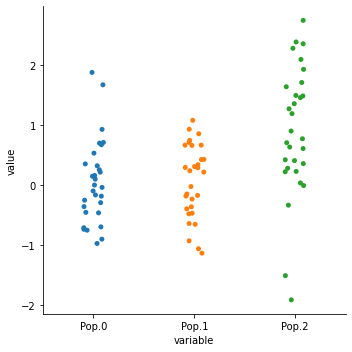

In [28]:





### Solution

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Statistics
# ANOVA
print(stats.f_oneway(df_test['Pop.0'],df_test['Pop.1'],df_test['Pop.2']))
# Post-hoc testing with T Tests
print(stats.ttest_ind(df_test['Pop.0'],df_test['Pop.1']))
print(stats.ttest_ind(df_test['Pop.0'],df_test['Pop.2']))
print(stats.ttest_ind(df_test['Pop.1'],df_test['Pop.2']))
#Visualization
df_test_long = df_test.melt(value_vars=df_test.columns)
print(df_test_long)
sns.catplot(x='variable', y='value', data=df_test_long)
plt.show()




